In [1]:
# !pip install --upgrade tensorflow
!pip install tensorflow==2.15
!pip install -U tf_keras # Keras 2
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

!pip install transformers datasets tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 99.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 41.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      S

In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from transformers import TFElectraForSequenceClassification, ElectraTokenizer
from datasets import load_dataset, load_metric
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
drive.mount('/content/drive')

# Saved fine tuned model
load_model_path = '/content/drive/My Drive/W266_Final_Project/Finetune_BASE_GLUE/electra-base-qnli-final'

Mounted at /content/drive


#Benchmarking ELECTRA Base on QNLI
- For the fine tuned model on 3 epochs

In [4]:
# https://colab.research.google.com/drive/1VoWyzlXZVR5sNygejktJ4Uguw3HIZckb?usp=sharing

# Load ELECTRA BASE fine tuned
tokenizer = ElectraTokenizer.from_pretrained('google/electra-base-discriminator')
model = TFElectraForSequenceClassification.from_pretrained(load_model_path)

# Load and preprocess the GLUE QNLI dataset
# https://huggingface.co/docs/datasets/v1.1.2/loading_datasets.html
# https://huggingface.co/docs/datasets/en/process
# https://huggingface.co/datasets/nyu-mll/glue
dataset = load_dataset("glue", "qnli")
metric = load_metric("glue", "qnli")

encoded_dataset = dataset.map(lambda examples: tokenizer(examples["question"],
                                                         examples["sentence"],
                                                         truncation=True,
                                                         padding="max_length",
                                                         return_tensors="tf"),
                              batched=True)

# Convert to TensorFlow dataset
# https://huggingface.co/docs/datasets/v1.16.1/use_dataset.html
validation_data = encoded_dataset["validation"].to_tf_dataset(columns=["attention_mask", "input_ids", "token_type_ids"],
                                                              label_cols=["label"],
                                                              shuffle=False,
                                                              batch_size=32)

# # Predict
# # https://huggingface.co/docs/datasets/v1.12.0/metrics.html
# predictions = model.predict(validation_data)['logits']
# pos_probs = tf.nn.softmax(predictions, axis=-1)[:, 1].numpy()
# predicted_labels = np.argmax(predictions, axis=1)
# true_labels = [example['label'] for example in dataset['validation']]
# accuracy = metric.compute(predictions=predicted_labels, references=true_labels)

# print('Accuracy on QNLI validation set:', accuracy['accuracy'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFElectraForSequenceClassification.

All the layers of TFElectraForSequenceClassification were initialized from the model checkpoint at /content/drive/My Drive/W266_Final_Project/Finetune_BASE_GLUE/electra-base-qnli-final.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFElectraForSequenceClassification for predictions without further training.


Generating train split:   0%|          | 0/104743 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5463 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5463 [00:00<?, ? examples/s]

<ipython-input-4-e5b788e6f1ab>:12: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("glue", "qnli")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for glue contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/glue/glue.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


Map:   0%|          | 0/104743 [00:00<?, ? examples/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Map:   0%|          | 0/5463 [00:00<?, ? examples/s]

Map:   0%|          | 0/5463 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:401: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [5]:
# Predict
# https://huggingface.co/docs/datasets/v1.12.0/metrics.html
predictions = model.predict(validation_data)['logits']
pos_probs = tf.nn.softmax(predictions, axis=-1)[:, 1].numpy()
predicted_labels = np.argmax(predictions, axis=1)
true_labels = [example['label'] for example in dataset['validation']]
accuracy = metric.compute(predictions=predicted_labels, references=true_labels)

print('Accuracy on QNLI validation set:', accuracy['accuracy'])

171/171 [==============================] - 45s 148ms/step
Accuracy on QNLI validation set: 0.9123192385136372


- ELECTRA BASE fine tuned on GLUE QNLI for Question Answering and then Benchmarked on the same GLUE QNLI for Question Answering
- Ran in Google Colab Pro+ on T4 GPU and High RAM
  - System RAM 3.1GB
  - GPU RAM 4.1GB
  - Ran in about 242 seconds
- Accuracy on QNLI validation set: 0.9123192385136372




---



# Analysis

In [8]:
model.summary()

Model: "tf_electra_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 electra (TFElectraMainLaye  multiple                  108891648 
 r)                                                              
                                                                 
 classifier (TFElectraClass  multiple                  592130    
 ificationHead)                                                  
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 109483778 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Performance Evaluation

### Confusion Matrix

[[2461  241]
 [ 214 2547]]


<Axes: >

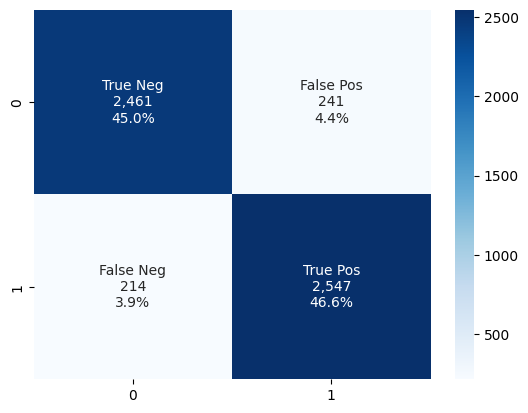

In [9]:
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

Confusion_Matrix = confusion_matrix(true_labels, predicted_labels)
print(Confusion_Matrix)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{:,}".format(value) for value in Confusion_Matrix.flatten()]
group_percentages = ["{0:.1%}".format(value) for value in Confusion_Matrix.flatten()/np.sum(Confusion_Matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_Matrix, annot=labels, fmt='', cmap='Blues')



---



### F1 Score, Precision, and Recall

In [10]:
F1_Score = f1_score(true_labels, predicted_labels)
Precision = precision_score(true_labels, predicted_labels)
Recall = recall_score(true_labels, predicted_labels)

accuracy = accuracy_score(true_labels, predicted_labels)

tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
specificity = tn / (tn + fp)

print("F1 Score:\t", round(F1_Score, 4))
print("Precision:\t", round(Precision, 4))
print("Recall:\t\t", round(Recall, 4))
print("Accuracy:\t", round(accuracy, 4))
print("Specificity:\t", round(specificity, 4))



F1 Score:	 0.918
Precision:	 0.9136
Recall:		 0.9225
Accuracy:	 0.9167
Specificity:	 0.9108




---



## Error Analysis
- https://dataheroes.ai/blog/improving-machine-learning-models-a-guide-to-error-classification-analysis/
- Per Huggingface guidelines: 0 = Entailment, 1 = Not Entailment

### Error Categorization

In [11]:
NUM_PRED_ERRORS = 30

error_indices = []
for i in range(len(predicted_labels)):
    if predicted_labels[i] != true_labels[i]:
        error_indices.append(i)

sample_error_indices = np.random.choice(error_indices, size=NUM_PRED_ERRORS, replace=False)

In [12]:
print("Predicted Labels:\t", "{:,}".format(len(predicted_labels)))
print("True Labels:\t\t", "{:,}".format(len(true_labels)))
print("Error Indices:\t\t", "{:,}".format(len(error_indices)))

Predicted Labels:	 5,463
True Labels:		 5,463
Error Indices:		 455


#### Question Types Struggles

In [13]:
len(dataset['validation']['question'])

5463

In [14]:
dataset['validation']['question'][:10]

['What came into force after the new constitution was herald?',
 'What is the first major city in the stream of the Rhine?',
 'What is the minimum required if you want to teach in Canada?',
 "How was Temüjin kept imprisoned by the Tayichi'ud?",
 'What did Herr Gott, dich loben wir become known as ?',
 'What year did the the case go before the supreme court?',
 'What does UMC stand for?',
 'What is the name of the professional skateboarder that lives in southern California?',
 "Where did Temüjin hide during his escape from the Tayichi'ud?",
 'What are the most active parts of ctenophora?']

In [15]:
# First word of each question
first_word = []
word_counts = []
for question in dataset['validation']['question']:
    words = question.split()[:1]
    first_word.append(words)
    first_word.sort()
    word_count = len(question.split())
    word_counts.append(word_count)


# Questions with incorrectly predicted answers
incorrect_predictions = []
for i in range(len(predicted_labels)):
    if predicted_labels[i] != true_labels[i]:
        incorrect_predictions.append(i)

# First word of all the incorrect predictions
incorrect_predictions_first_word = []
for i in incorrect_predictions:
    incorrect_predictions_first_word.append(first_word[i])

In [16]:
len(incorrect_predictions_first_word)

455

In [17]:
first_word_df = pd.DataFrame(incorrect_predictions_first_word, columns=["First_Word"])
first_word_df = first_word_df.groupby(["First_Word"]).size().sort_values(ascending=False).head(10)
error_types = pd.DataFrame(first_word_df, columns=["Error Count"])
error_types

,Error Count
First_Word,
What,202
How,58
Who,47
When,25
In,18
Which,17
Where,15
Why,14
The,12


In [18]:
error_types["Pct of Total Errors"] = round(error_types["Error Count"] / len(dataset['validation']['question']) * 100, 2)
error_types["Pct of Total Errors"] = error_types["Pct of Total Errors"].apply(lambda x: f"{x}%")
error_types

,Error Count,Pct of Total Errors
First_Word,,
What,202,3.7%
How,58,1.06%
Who,47,0.86%
When,25,0.46%
In,18,0.33%
Which,17,0.31%
Where,15,0.27%
Why,14,0.26%
The,12,0.22%


#### Answer Length Struggles

##### Incorrect Predictions

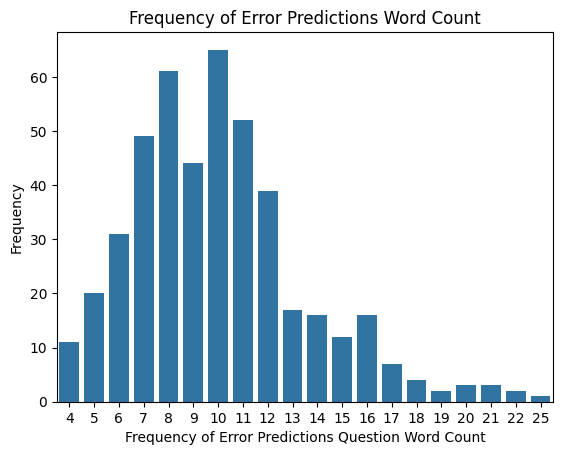

In [19]:
word_count_freq = []
for i in incorrect_predictions:
    word_count_freq.append(word_counts[i])

word_count_freq_df = pd.DataFrame(word_count_freq, columns=["Error_Predictions_Question_Word_Count"])

word_count_freq_df = word_count_freq_df['Error_Predictions_Question_Word_Count'].value_counts().reset_index()
word_count_freq_df.columns = ['Error_Predictions_Question_Word_Count', 'Frequency']

word_count_freq_df = word_count_freq_df.sort_values(by='Error_Predictions_Question_Word_Count')

sns.barplot(x='Error_Predictions_Question_Word_Count', y='Frequency', data=word_count_freq_df)
plt.xlabel('Frequency of Error Predictions Question Word Count')
plt.ylabel('Frequency')
plt.title('Frequency of Error Predictions Word Count')
plt.show()

##### Correct Predictions

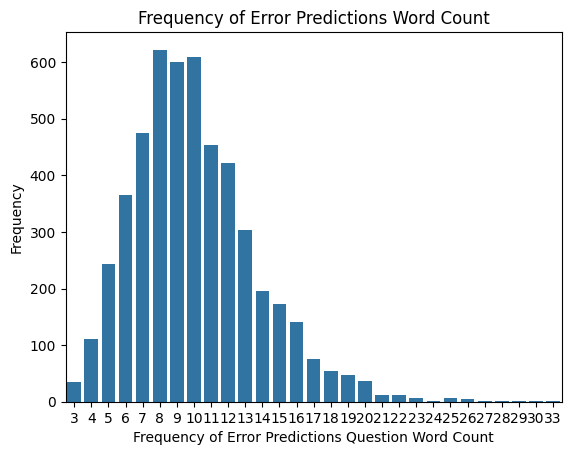

In [20]:
correct_predictions = []
for i in range(len(predicted_labels)):
    if predicted_labels[i] == true_labels[i]:
        correct_predictions.append(i)

word_count_freq = []
for i in correct_predictions:
    word_count_freq.append(word_counts[i])

word_count_freq_df = pd.DataFrame(word_count_freq, columns=["Error_Predictions_Question_Word_Count"])

word_count_freq_df = word_count_freq_df['Error_Predictions_Question_Word_Count'].value_counts().reset_index()
word_count_freq_df.columns = ['Error_Predictions_Question_Word_Count', 'Frequency']

word_count_freq_df = word_count_freq_df.sort_values(by='Error_Predictions_Question_Word_Count')

sns.barplot(x='Error_Predictions_Question_Word_Count', y='Frequency', data=word_count_freq_df)
plt.xlabel('Frequency of Error Predictions Question Word Count')
plt.ylabel('Frequency')
plt.title('Frequency of Error Predictions Word Count')
plt.show()

In [21]:
len(correct_predictions)

5008

#### Manual Error Categorization

In [22]:
print("Sample Errors:\n\n")

for i in sample_error_indices:
    print(f"Index:\t\t {i}")
    print(f"Question:\t {dataset['validation'][int(i)]['question']}")
    print(f"Answer:\t\t {dataset['validation'][int(i)]['sentence']}")
    print(f"True Label:\t {true_labels[i]}")
    print(f"Predicted Label: {predicted_labels[i]}")
    print("----------------------------------------------------------------------------\n\n")

Sample Errors:


Index:		 5229
Question:	 How many former MVP honorees were present for a pregame ceremony?
Answer:		 In honor of the 50th Super Bowl, the pregame ceremony featured the on-field introduction of 39 of the 43 previous Super Bowl Most Valuable Players.
True Label:	 0
Predicted Label: 1
----------------------------------------------------------------------------


Index:		 4586
Question:	 Between 1978 an d2008 four year full time undergraduate students were required to complete how many classes outside of their concentration?
Answer:		 Between 1978 and 2008, entering students were required to complete a core curriculum of seven classes outside of their concentration.
True Label:	 0
Predicted Label: 1
----------------------------------------------------------------------------


Index:		 3331
Question:	 In what decades was Dudley Simpson most active in contributing to Doctor Who?
Answer:		 Simpson's first Doctor Who score was Planet of Giants (1964) and he went on to write m



---



### Error Rate Analysis
- Error rate for the different categories of questions
- To identify areas where the model struggles
- Error Rate = Number of Errors in a Category / Total Number of Errors
- Categories:
    - Question understanding errors: 22 / 30 = 0.6333
    - Context understanding errors: 6 / 30 = 0.1667
    - Factual errors: 3 / 30 = 0.100
    - Logical errors: 2 / 30 = 0.0667



---



### Precision-Recall Curve

sklearn.metrics.precision_recall_curve

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

In [23]:
precision, recall, thresholds = precision_recall_curve(true_labels, pos_probs)

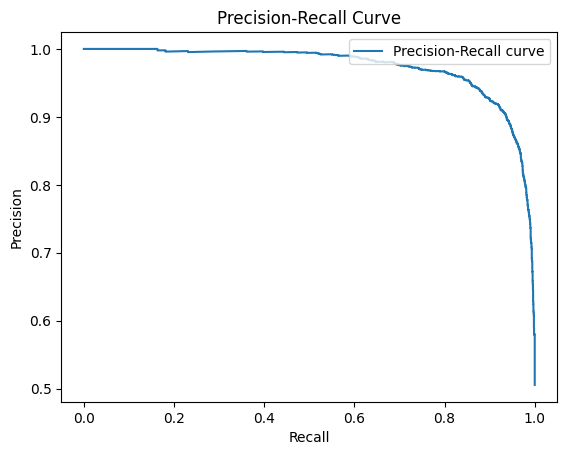

In [24]:
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

In [25]:
precision

array([0.50539996, 0.50549249, 0.50558506, ..., 1.        , 1.        ,
       1.        ])

In [26]:
recall

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       7.24375226e-04, 3.62187613e-04, 0.00000000e+00])

In [27]:
thresholds

array([0.00238803, 0.00240158, 0.00240396, ..., 0.99957055, 0.9995733 ,
       0.9995752 ], dtype=float32)

In [28]:
target_values = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

for target_precision in target_values:
  best_threshold = None

  for i in range(len(thresholds)):
      if precision[i] > target_precision:
          if best_threshold is None or recall[i] > recall[np.where(thresholds == best_threshold)][0]:
              best_threshold = thresholds[i]

  print(f"The best threshold for high precision above {target_precision} is: {best_threshold}")

The best threshold for high precision above 0.9 is: 0.5832990407943726
The best threshold for high precision above 0.91 is: 0.672290563583374
The best threshold for high precision above 0.92 is: 0.7323020696640015
The best threshold for high precision above 0.93 is: 0.8323331475257874
The best threshold for high precision above 0.94 is: 0.8740699887275696
The best threshold for high precision above 0.95 is: 0.9161592721939087
The best threshold for high precision above 0.96 is: 0.9486009478569031
The best threshold for high precision above 0.97 is: 0.9782659411430359
The best threshold for high precision above 0.98 is: 0.9870288372039795
The best threshold for high precision above 0.99 is: 0.993996262550354




---



# Threshold Verification

In [29]:
# Obtained from previous calculations above
precision_threshold = 0.9161592721939087

predicted_labels = [1 if pred_prob > precision_threshold else 0 for pred_prob in pos_probs]

# predicted_labels

In [30]:
true_labels = [example['label'] for example in dataset['validation']]
# true_labels

### Confusion Matrix

[[2578  124]
 [ 396 2365]]


<Axes: >

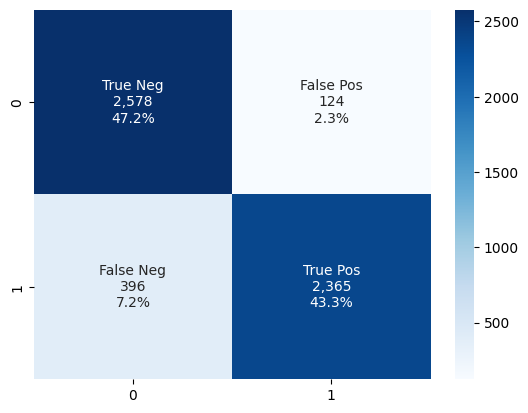

In [31]:
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

Confusion_Matrix = confusion_matrix(true_labels, predicted_labels)
print(Confusion_Matrix)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{:,}".format(value) for value in Confusion_Matrix.flatten()]
group_percentages = ["{0:.1%}".format(value) for value in Confusion_Matrix.flatten()/np.sum(Confusion_Matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_Matrix, annot=labels, fmt='', cmap='Blues')



---



### F1 Score, Precision, and Recall

In [32]:
F1_Score = f1_score(true_labels, predicted_labels)
Precision = precision_score(true_labels, predicted_labels)
Recall = recall_score(true_labels, predicted_labels)

accuracy = accuracy_score(true_labels, predicted_labels)

tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
specificity = tn / (tn + fp)

print("F1 Score:\t", round(F1_Score, 4))
print("Precision:\t", round(Precision, 4))
print("Recall:\t\t", round(Recall, 4))
print("Accuracy:\t", round(accuracy, 4))
print("Specificity:\t", round(specificity, 4))



F1 Score:	 0.901
Precision:	 0.9502
Recall:		 0.8566
Accuracy:	 0.9048
Specificity:	 0.9541




---



### Performance Analysis



- F1 score is high at 0.9158 therefore this ELECTRA Base model fine tuned on QNLI is a robust model, balancing precision and recall well.
- The precision is at 0.8894, therefore the model would only predict a positive class correctly 88.94% of the time, so it would be a point of concern for our dual-model system intended for professionals needing precision. We would need to adjust the threshold to boost precision at the cost of recall.
- The accuracy is above 0.9000 at 0.9123 so the model is largely correct in classifying entailment or not.

### Error Analysis

In our analysis of the ELECTRA Base model, we observed an overall error rate of approximately 8.77%, which is a strong indication of the model's accuracy. The most common questions that led to errors began with "what," accounting for 4.03% of mistakes. The errors appeared to not be correlated with question length. Both correct and incorrect predictions were associated with questions of similar word counts, ranging from 8 to 11 words. In particular, we did not see that the model struggled with very short (3-4 words) or very long (21-33 words) questions.

Our manual review categorized errors into four types: "Question understanding", "Context understanding", "Factual errors", and "Logical errors", with corresponding error rates of 0.6333, 0.1667, 0.10000, and 0.0667. The model seemed most error-prone due to it not understanding the question being asked.

Examining the precision-recall curve revealed that precision tends to drop sharply after a value of 0.9. Further threshold analysis showed that setting a threshold at 0.5833 maintains a high precision above 0.9, while a threshold of 0.6723 is needed for precision above 0.91. These insights are valuable for adjusting the threshold in future experiments to enhance precision.

### Improvement Strategies

To improve our model, we would resort to data augmentation. In particular, we would increase questions starting with "what." Context understanding was a minimal issue, so we do not think that the attention mechanism needs to be tweaked. Our manual review of thirty random error predictions showed that the questions were not ambiguous. Perhaps a more varied training dataset could reduce these errors.